In [24]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error

In [2]:
df1 = pd.read_parquet('/home/agustin/MLOPS_ZOOMCAMP/01-intro/data/yellow_tripdata_2023-01.parquet')
df2 = pd.read_parquet('./data/yellow_tripdata_2023-02.parquet')
df_list = [df1, df2]

df1.head(2)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.0,0.5,0.0,0.0,1.0,14.3,2.5,0.0
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.0,0.5,4.0,0.0,1.0,16.9,2.5,0.0


In [3]:
#Q1
df1.shape[1], df2.shape[1]

(19, 19)

In [4]:
#Q2

for df in df_list:
    df['duration'] = round((df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.seconds/60,2)
    
duration = pd.concat([df1.duration, df2.duration])

df1.duration.std(ddof=0), df2.duration.std(ddof=0), df1.duration.std(ddof=1), df2.duration.std(ddof=1), duration.std(ddof=1)

(41.62918664280529,
 44.34669444893317,
 41.6291934299545,
 44.34670205830014,
 42.9753781342996)

In [5]:
#Q3
# remove outliers
train_df = df1.copy()
train_df = train_df[(train_df['duration']<=60)&(train_df['duration']>=1)]

len(train_df['duration'])/len(df1['duration'])


0.9812212604417814

In [10]:
#Q4
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

train_df[categorical] = train_df[categorical].astype(str)

train_dicts = train_df[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [21]:
target = ['duration']
y_train = train_df[target].values

In [27]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)

In [17]:
X_train.shape, train_df.shape

((3009176, 516), (3009176, 20))

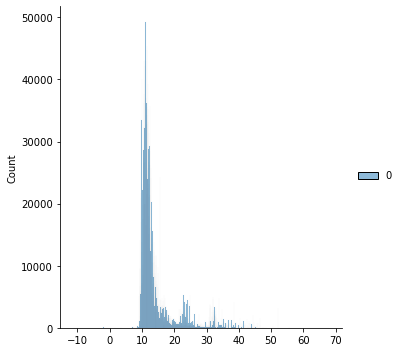

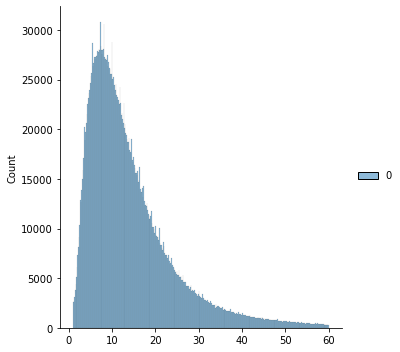

In [29]:
sns.displot(y_pred, label='prediction')
sns.displot(y_train, label='actual')
             

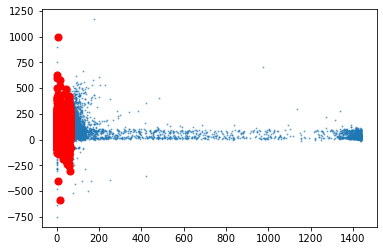

In [76]:
import matplotlib.pyplot as plt

plt.scatter(df1.duration, df1.total_amount, s=1, alpha=0.5)
plt.scatter(train_df.duration, train_df.total_amount, s=50, c='r')

#fig, axs = plt.subplots(1,2)
#axs = axs.flatten()
#axs[0].scatter(df1.duration, df1.total_amount)
#axs[1].scatter(train_df.duration, train_df.total_amount)

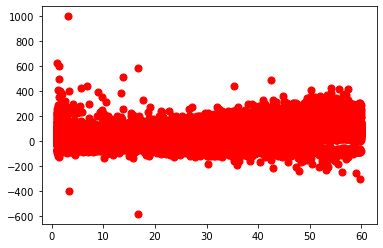

In [77]:
plt.scatter(train_df.duration, train_df.total_amount, s=50, c='r')
